# Q1

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

In [2]:
dt = pd.read_csv("Cutlets.csv")
dt

,Unit A,Unit B
0,6.809,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.684,7.2402
9,6.8236,7.0503


In [3]:
dt.describe()

,Unit B
count,35.000000
mean,6.964297
std,0.343401
min,6.038000
25%,6.753600
50%,6.939900
75%,7.195000
max,7.545900


In [6]:
dt = dt[pd.to_numeric(dt["Unit A"], errors='coerce').notnull()]

In [7]:
dt.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\1921767823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt.corr()


,Unit B
Unit B,1.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\837766182.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt["Unit A"],bins = 15,color = 'purple')


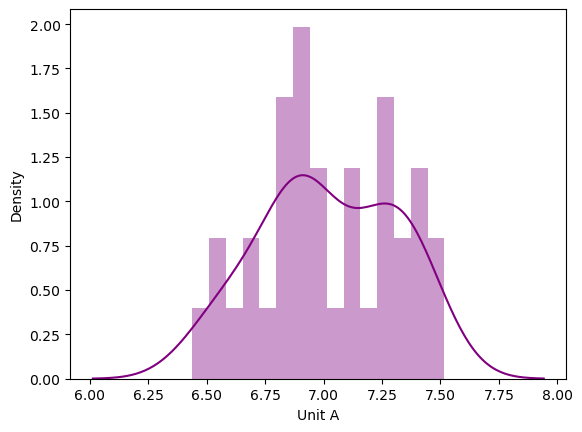

In [8]:
sns.distplot(dt["Unit A"],bins = 15,color = 'purple')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\1269682199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt["Unit B"],bins = 10,color = 'purple')


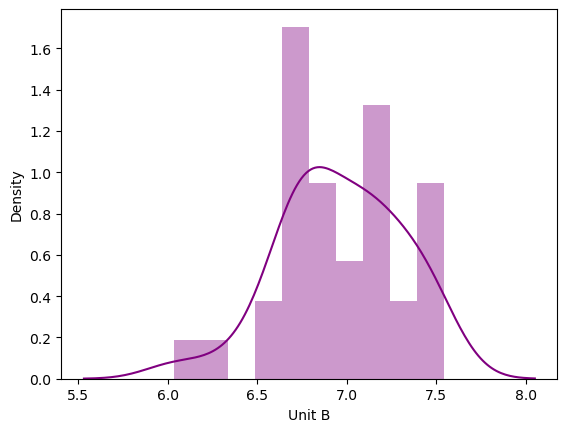

In [9]:
sns.distplot(dt["Unit B"],bins = 10,color = 'purple')
plt.show()

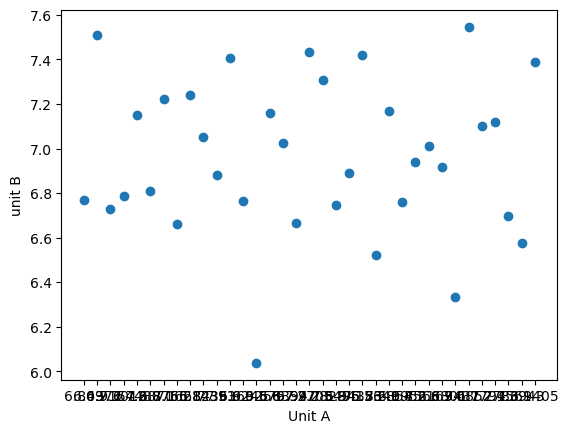

In [10]:
plt.scatter(dt['Unit A'],dt['Unit B'])
plt.xlabel('Unit A')
plt.ylabel('unit B')
plt.show()

In [13]:
dt["Unit A"] = pd.to_numeric(dt["Unit A"], errors='coerce')
dt["Unit B"] = pd.to_numeric(dt["Unit B"], errors='coerce')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\1232318414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Unit A"] = pd.to_numeric(dt["Unit A"], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\1232318414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["Unit B"] = pd.to_numeric(dt["Unit B"], errors='coerce')


In [14]:
dt = dt.dropna(subset=["Unit A", "Unit B"])

In [15]:
t_statistic, P_values = ttest_ind(dt["Unit A"], dt["Unit B"], equal_var=False)

In [16]:
from scipy.stats import ttest_ind
t_statistic , P_values = ttest_ind(dt["Unit A"],dt["Unit B"],equal_var = False)

In [17]:
print(f"t_statistics = {t_statistic} and p_values = {P_values}")

t_statistics = 0.7228688704678063 and p_values = 0.47231324819145404


In [18]:
# level of significance(alpha) = 5% = 0.05
alpha = 0.05
if P_values >= alpha:
    print(f"we fail to reject null hypothesis(p_values = {P_values} >= alpha(0.05)).\nhence there is no significance difference between in the diameter of the cutlet between two units")
else: 
    print(f"we reject null hypothesis(p_values = {P_values} < alpha(0.05)).\nhence there is a significance difference between in the diameter of the cutlet between two units")    

we fail to reject null hypothesis(p_values = 0.47231324819145404 >= alpha(0.05)).
hence there is no significance difference between in the diameter of the cutlet between two units


# Q2

In [19]:
dd = pd.read_csv("labTAT.csv")
dd

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
145,NaN,NaN,NaN,NaN
146,6. Quality Control:,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN


In [20]:
dd.describe()

,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.00000
mean,178.902917,199.913250,163.68275
std,14.957114,16.539033,15.08508
min,140.550000,159.690000,124.06000
25%,168.025000,188.232500,154.05000
50%,178.870000,199.805000,164.42500
75%,189.112500,211.332500,172.88250
max,217.860000,238.700000,205.18000


In [21]:
dd.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\327060458.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dd.corr()


,Laboratory 2,Laboratory 3,Laboratory 4
Laboratory 2,1.000000,-0.065967,0.062120
Laboratory 3,-0.065967,1.000000,-0.125211
Laboratory 4,0.062120,-0.125211,1.000000


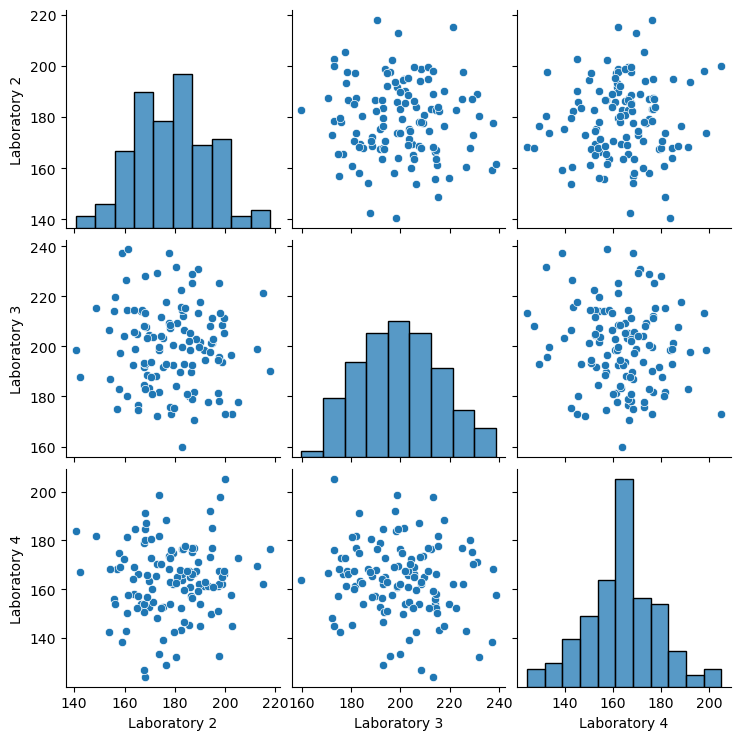

In [25]:
sns.pairplot(dd)
plt.show()

In [27]:
dd[['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4']] = dd[['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4']].apply(pd.to_numeric, errors='coerce')

In [28]:
dd = dd.dropna(subset=['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4'])

In [29]:
t_statistic, p_value = stats.f_oneway(dd['Laboratory 1'], dd['Laboratory 2'], dd['Laboratory 3'], dd['Laboratory 4'])

In [30]:
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 118.70421654401437
p-value: 2.1156708949992414e-57


In [31]:
if p_value < 0.05:
    print("\nYou can reject the null hypothesis and conclude that there is a significant difference in the average TAT among the different laboratories.\n")
else:
    print("P-value is greater than the significance level; you cannot reject the null hypothesis.")


You can reject the null hypothesis and conclude that there is a significant difference in the average TAT among the different laboratories.



# Q3

In [39]:
d3 = pd.read_csv("BuyerRatio.csv")
d3 = d3.drop(columns=["Observed Values"])

In [33]:
d3.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [34]:
d3.corr()

,East,West,North,South
East,1.0,1.0,1.0,1.0
West,1.0,1.0,1.0,1.0
North,1.0,1.0,1.0,1.0
South,1.0,1.0,1.0,1.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\4165880464.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d3,bins = 7,color = 'purple')


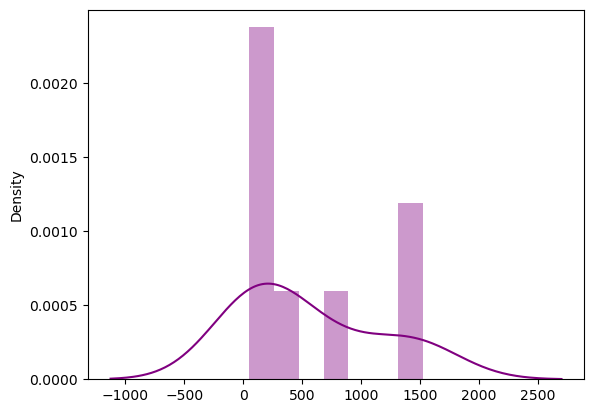

In [35]:
sns.distplot(d3,bins = 7,color = 'purple')
plt.show()

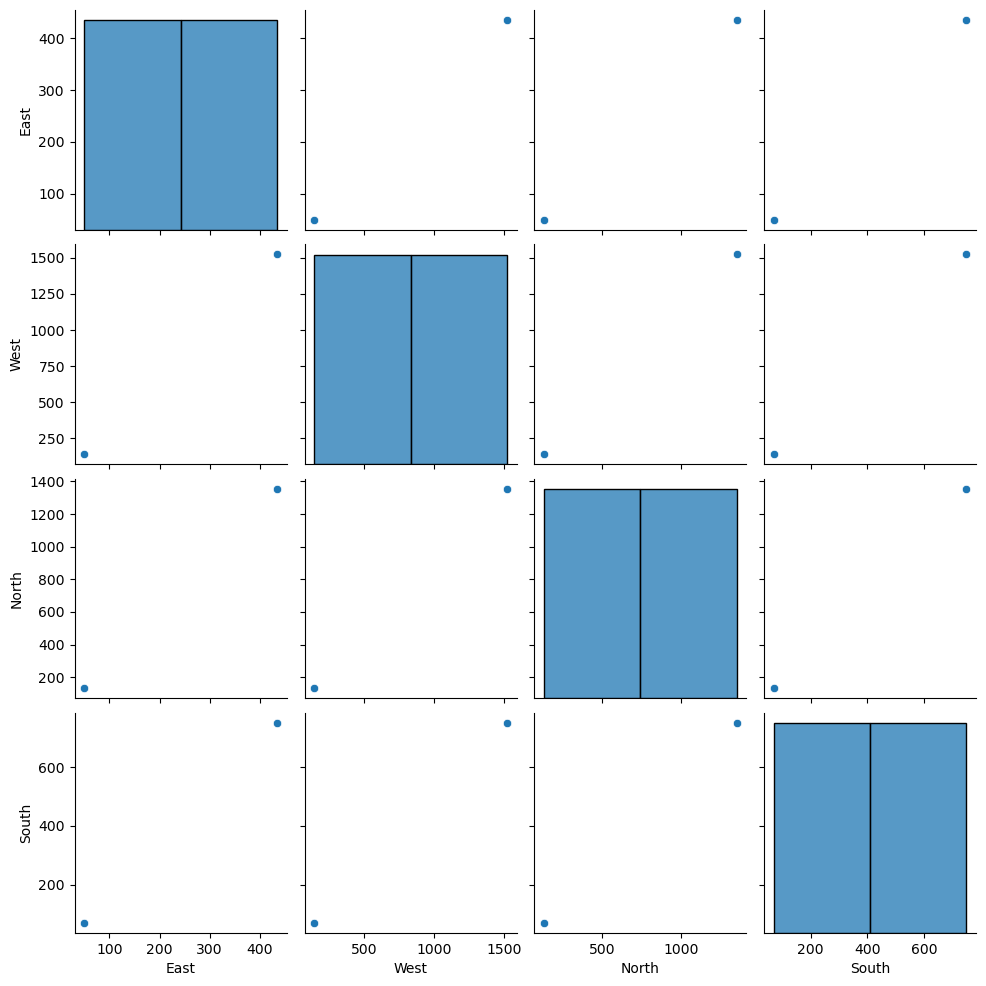

In [36]:
sns.pairplot(d3)
plt.show()

In [37]:
import numpy as np
from scipy.stats import chisquare

# Perform the chi-square test for independence
t_statistic, p_value = chisquare(f_obs = d3,)

print("Chi-square statistic:", t_statistic)
print("p-value:", p_value)
print("\nHo = All proportions are equal\nH1 = Not all Proportions are equal\n")
for i in range(len(p_value)):
    if (p_value[i] < 0.05):
        print("we reject Null Hypothesis")
    else:
        print("\nwe fail to reject null hypothesis")

Chi-square statistic: [nan nan nan nan]
p-value: [nan nan nan nan]

Ho = All proportions are equal
H1 = Not all Proportions are equal


we fail to reject null hypothesis

we fail to reject null hypothesis

we fail to reject null hypothesis

we fail to reject null hypothesis


# Q4

In [38]:
d4 = pd.read_csv("Costomer+OrderForm.csv")
d4

,Phillippines,Indonesia,Malta,India,Unnamed: 4
0,Error Free,Error Free,Defective,Error Free,NaN
1,Error Free,Error Free,Error Free,Defective,NaN
2,Error Free,Defective,Defective,Error Free,NaN
3,Error Free,Error Free,Error Free,Error Free,NaN
4,Error Free,Error Free,Defective,Error Free,NaN
...,...,...,...,...,...
302,1,Error Free,Error Free,Defective,Error Free
303,2,Error Free,Error Free,Error Free,Defective
304,3,Error Free,Defective,Defective,Error Free
305,4,Error Free,Error Free,Defective,Error Free


In [40]:
d4 = d4.replace({'Error Free': 1, 'Defective': 0})

In [41]:
d4.describe()

,Phillippines,Indonesia,Malta,India,Unnamed: 4
count,306,306,306,306,6
unique,8,3,3,3,3
top,1,1,1,1,1
freq,271,272,273,282,3


In [50]:
numeric_data = pd.to_numeric(d4['India'], errors='coerce').dropna()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15704\1924129922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_data, bins=15, color='purple')


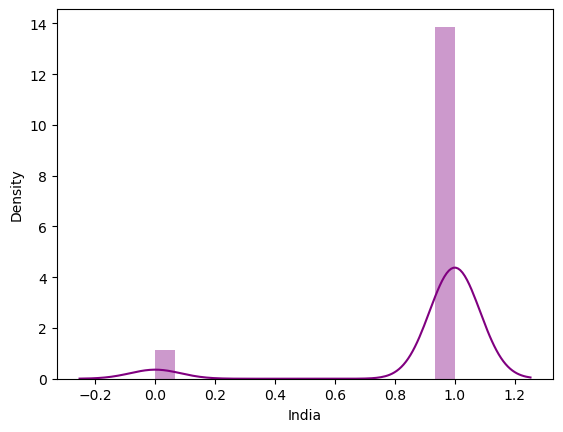

In [52]:
sns.distplot(numeric_data, bins=15, color='purple')
plt.show()

In [56]:
print(d4.columns)

Index(['Phillippines', 'Indonesia', 'Malta', 'India', 'Unnamed: 4'], dtype='object')


In [60]:
columns_to_plot = ['Phillippines', 'Indonesia', 'India', 'Malta']

In [61]:
numeric_data = d4[columns_to_plot].apply(pd.to_numeric, errors='coerce').dropna()

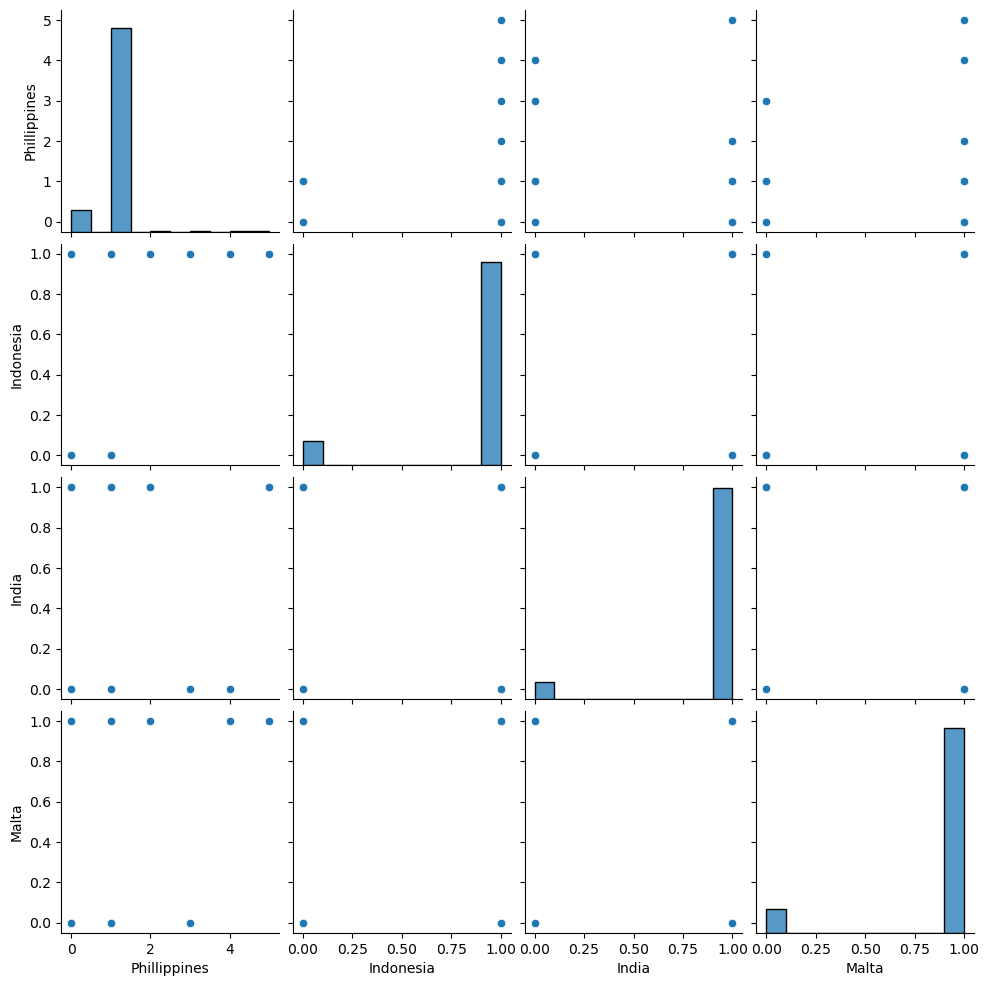

In [62]:
sns.pairplot(numeric_data)
plt.show()

In [66]:
print("Original DataFrame:")
print(d4)

Original DataFrame:
    Phillippines Indonesia Malta India Unnamed: 4
0              1         1     0     1        NaN
1              1         1     1     0        NaN
2              1         0     0     1        NaN
3              1         1     1     1        NaN
4              1         1     0     1        NaN
..           ...       ...   ...   ...        ...
302            1         1     1     0          1
303            2         1     1     1          0
304            3         1     0     0          1
305            4         1     1     0          1
306            5         1     1     1          0

[307 rows x 5 columns]


In [67]:
le = LabelEncoder()

In [69]:
for column in d4.columns:
    # Convert all values in the column to strings
    d4[column] = d4[column].astype(str)

In [70]:
if d4[column].dtype == 'object':
        d4[column] = le.fit_transform(d4[column])

In [71]:
print("\nDataFrame after replacing categorical values with numbers:")
print(d4)


DataFrame after replacing categorical values with numbers:
    Phillippines Indonesia Malta India  Unnamed: 4
0              1         1     0     1           3
1              1         1     1     0           3
2              1         0     0     1           3
3              1         1     1     1           3
4              1         1     0     1           3
..           ...       ...   ...   ...         ...
302            1         1     1     0           1
303            2         1     1     1           0
304            3         1     0     0           1
305            4         1     1     0           1
306            5         1     1     1           0

[307 rows x 5 columns]
